# Projet numérique : lignes de niveau

In [54]:
import autograd
import matplotlib.pyplot as plt
from autograd import numpy as np

In [55]:
def h(x, y) :
    return (np.exp(-(x**2)-(y**2))-np.exp(-((x-1)**2)-((y-1)**2)))  
# h est une fonction de deux variables réelles à valeurs réelles, continûment différentiable

In [56]:
def f(x, y) :
    return x**2 + y**2 - 0.5

## Contour simple

### Amorce

$f$ est supposée continûment différentiable, donc continue sur $[0,1]^2$. Si $f(0,0) \leqslant c \leqslant f(0,1)$ ou $f(0,1) \leqslant c \leqslant f(0,0)$, alors d'après le théorème des valeurs intermédiairs on est certain que $\exists  t \in [0,1]$ tel que $f(0,t) = c$.

Pour déterminer un tel $t$, on utilise la méthode de la dichotomie.

##### Démonstration et principe de la dichotomie :

L’objectif est de montrer que le processus décrit converge, et qu’il converge vers un point de la ligne de niveau.
On se place dans le cas où $f(0,0)<=c<=f(0,1)$  
On pose $a_{0}=0, b_{0}=1 c_{0}=\frac{a_{0}+b_{0}}{2}$ et on va construire $(a_{n}), (b_{n})$ et $(c_{n}) \in N^{N} /  \forall n \in N a_{n+1}=a_{n}$ et $b_{n+1}=c_{n}si f(0,c_{n})>c$ et l’inverse sinon et $c_{n+1}=\frac{a_{n+1}+b_{n+1}}{2}$, car la continuité de f puis l’application du TVI assurent par cette construction que $\forall n \in N, \exists a_{n}\leq t_{n} \leq b_{n} / f(0,t_{n})=c$.  
De manière immédiate, si $\exists n \in N /f(0,c_{n})=c$ on sort de la boucle et on renvoi la valeur de $c_{n}$. Alors, l’algorithme termine et renvoie bien un point de la courbe de niveau.  
Sinon, par récurrence immédiate on a $\forall n \in N, \frac{a_{n}+b_{n}}{2} \leq \frac{1}{2^{n}}$.  
Alors les suites $(a_{n})$ et $(b_{n})$ sont respectivement croissantes et décroissantes et la limite de leur différence est nulle en  $+\infty$. Donc elles sont adjacentes et convergent vers une limite $l$. Ainsi, $(c_{n})$ ainsi que $(t_{n})$ convergent aussi vers $l$. Alors, la continuité de $f$ et la définition de $(t_{n})$ implique alors que $(f(0,c_{n})$ tend vers $c$ , et on va pouvoir approcher la valeur de $l$ quelque soit la précision donnée ce qui termine la preuve.
Remarque : ici une boucle for de longueur 26 permet bien d’approcher cette limite $l$ à $10^{-26}$ près.


In [57]:
def find_seed(f, c=0.0, eps = 2**(-26)) : # renvoie un flottant éloigné d'au plus eps d'un tel t ou None si la condition ci-dessus n'est pas satisfaite
    # recherche dichotomique
    if f(0, 0) <= c <= f(0, 1) or f(0,1) <= c <= f(0, 0) :
        a = 0
        b = 1
        for n in range(26) :
            m = (a + b)/2
            if f(0, a) <= c <= f(0, b) :
                if f(0,m) > c :
                    b = m
                elif f(0, m) == c :
                    return m
                else :
                    a = m
            else :
                if f(0,m) > c :
                    a = m
                elif f(0, m) == c :
                    return m
                else :
                    b = m
        return m
    else :
        return None

### Propagation

#### Première méthode

On suppose en plus des hypothèses précédentes que la fonction $f$ dont on veut tracer les lignes de niveau vérifie les hypothèses du théorème des fonctions implicites, c'est-à-dire dans ce cas que la dérivée partielle de $f$ par rapport à la deuxième variable est inversible sur tout le domaine étudié.
Il existe alors une fonction $\psi$ telle que $f(x,y) = c \Leftrightarrow y = \psi(x)$
Autrement dit, tracer la ligne de niveau $f(x, y) = c$, c'est tracer le graphe de $\psi$.

Si on connaît le point $(x, \psi(x))$, on veut obtenir le point suivant $(x+h, \psi(x+h))$.
A l'ordre 1, on a $\psi(x+h) = \psi(x) + h\psi'(x) + o(h)$  
où d'après le théorème des fonctions implicites $\psi'(x) = -\frac{\frac{\partial f}{\partial x}(x, \psi(x))}{\frac{\partial f}{\partial y}(x, \psi(x))}$

De plus, la distance entre $(x,\psi(x))$ et $(x+h,\psi(x+h))$ doit être de l'ordre de $\delta$.  
Autrement dit $\sqrt{h^2 +(\psi(x+h) - \psi(x))^2}=\delta$  
Or $\psi(x+h)-\psi(x) \approx h\psi'(x)$  
Donc on choisit $h=\frac{\delta}{\sqrt{1+\psi'(x)^2}} \leqslant \delta$, $h$ est inférieur à $\delta$, ce qui valide l’approximation au 1er ordre du développement de Taylor pour $\psi$.

Remarques :  
- On choisit $h>0$ pour tracer la ligne vers la droite, sachant qu'on initialise sur l'arête gauche de la cellule.  
- La précision du tracé dépend de $\delta$

In [58]:
def grad_f(f, x, y) :
    g = autograd.grad
    return np.r_[g(f, 0)(x, y), g(f, 1)(x, y)]     # calcule le gradient de f en (x,y)
    
def psi_prime(f, x, y) :
    T = grad_f(f, x, y)
    return float(-T[0]/T[1]) #calcule la dérivée de la fonction implicite psi, donnée par le théorème des fonctions implicites.

In [59]:
def point_suivant(f, x, y, delta = 0.01) : 
    pp = psi_prime(f, x, y)
    h = delta/np.sqrt(1 + pp**2)
    return (float(x + h), float(y + h*pp)) 
 #A chaque étape, on calcule à partir de la donnée de psi prime les coordonnées du point suivant dans le sens des x croissants sur la ligne de niveau
#avec l'approximation f(x+h)=f(x)=f'(x)*h pour h petit

On peut à présent tracer le fragment de ligne de niveau dans la cellule

In [60]:
def simple_contour(f, c = 0.0, delta = 0.01) :
    t = find_seed(f, c)
    if t != None :
        abscisse = [0.0]
        ordonnee = [t]
        while abscisse[-1] <= 1 and 0 <= ordonnee[-1] <= 1 :
            x, y = point_suivant(f, abscisse[-1], ordonnee[-1])
            abscisse.append(x)
            ordonnee.append(y)
        return abscisse, ordonnee
    else :
        return [], []

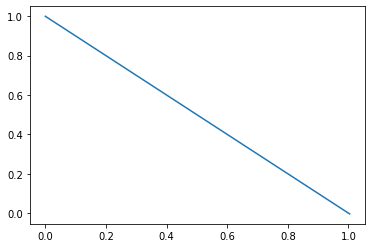

In [61]:
X, Y = simple_contour(h)
plt.plot(X, Y)

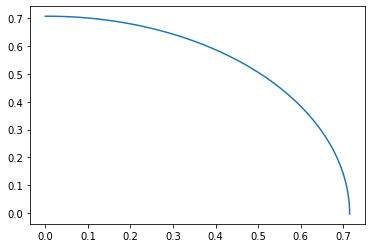

In [62]:
X, Y = simple_contour(f)
plt.plot(X, Y)

Limites de cette méthode :  
Le tracé de la ligne de niveau ne peut être réalisé que si le théorème des fonctions implicites s'applique, ie si la ligne de niveau n'admet pas de tangente verticale.

Dans le cas contraire, on peut faire plusieurs remarques. Tout d’abord, il y a fort peu de chances qu’informatiquement, on tombe sur une valeur qui soit précisément égale à 0. Si cela devait malgré tout arriver, on propose d'améliorer l'algorithme en effectuant les modifications suivantes : si au point $(x,y)$ la courbe admet une tangente verticale, on approxime le point suivant au point $(x, y \pm \epsilon)$ (on fait comme si la courbe était verticale entre $(x,y)$ et $(x, y \pm \epsilon)$).  
Ces modifications figurent dans la partie "contour complexe".

#### Deuxième méthode

A partir d'un point $(u,v)$ donné de la ligne de niveau $f(x,y) = c$, on construit le point suivant en se décalant sur la tangente de la ligne au point $(u,v)$,, orthogonale au gradient de la fonction étudiée en ce point, d'une distance $\delta$. Cette approximation étant un peu grossière, on affine le résultat en se rapprochant du point suivant "réel" grâce à une méthode de Newton en deux dimension. i.e. on cherche à annuler $F$ où :
  
$F : \begin{pmatrix} x \\ y \end{pmatrix} \mapsto \begin{pmatrix} f(x,y)-c \\ \sqrt{(x - u)^2 + (y - v)^2}-\delta \end{pmatrix}$  
  
La suite donnée par :  
  
$\begin{pmatrix} x_{n+1} \\ y_{n+1} \end{pmatrix} = \begin{pmatrix} x_n \\ y_n \end{pmatrix} + (J_F(x_n,y_n))^{-1} F(x_n,y_n)$,  
  
où $J_F(x_n,y_n)$ désigne la matrice jacobienne de $F$ en $(x_n,y_n)$, converge vers le point de la ligne de niveau situé à une distance $\delta$ de $(x,y)$.

In [63]:
def grad_f(f, x, y) :
    g = autograd.grad
    return np.r_[g(f, 0)(x, y), g(f, 1)(x, y)]  

def tangente(f, x, y) : # la tangente est orthogonale au gradient
    T=grad_f(f, x, y)
    a,b = T[0],T[1]
    return np.array([b, -a])

def F(f, x, y, xs, ys, c, delta) :
    dx =xs-x
    dy=ys-y
    s=np.sqrt(dx**2 + dy**2)-delta
    return np.array([f(xs, ys)-c, s])
# F est la fonction qu'on cherche à annuler par méthode de Newton en 2D

def J(f, x, y, xs, ys, c, delta) :
    J = np.zeros(4)
    J = J.reshape(2,2)
    def F1(xs, ys) :
        return F(f,x,y,xs,ys,c,delta)[0]
    def F2(xs, ys) :
        return F(f,x,y,xs,ys,c,delta)[1]
    J[0] = grad_f(F1, xs, ys)
    J[1] = grad_f(F2, xs, ys) 
    return(J) 
# calcul de la jacobienne de F en
# nous n'avons pas réussi à faire fonctionner autograd.jacobian

In [64]:
def point_suivant_deux(f, x ,y, c, delta, eps) :
    T = tangente(f, x, y)
    a, b = T[1], T[0]
    if b < 0 :
        a = -a
        b = -b  # on veut tracer la ligne vers la droite en partant de l'arête de gauche
    xs = x+b*delta/np.sqrt(a**2 + b**2)
    ys = y +a*delta/np.sqrt(a**2 + b**2)
    ecart = 1 + eps
    while ecart > eps  :
        if np.linalg.det(J(f,x,y,xs,ys,c,delta)) != 0 :
            E = -np.dot(np.linalg.inv(J(f, x, y, xs, ys, c, delta)), F(f,x,y,xs,ys,c,delta).reshape(2, 1))
            xs = xs + E[0]
            ys = ys + E[1]
            ecart = np.linalg.norm(E)
        else :
            break
    return(xs, ys)

Remarques :  
La méthode de Newton ne peut fonctionner que si la jacobienne de la fonction $F$ définie plus haut est inversible. Dans le cas contraire, on arrête l'algorithme, quitte à avoir une moins bonne précision.
De plus, pour que la tangente existe, il faut que le gradient de $f$ soit non nul, ce cas n'est pas traité par notre algorithme.

In [65]:
def simple_contour_deux(f, c = 0.0, delta = 0.01, eps = 2**(-26)) :
    t = find_seed(f, c)
    if t != None :
        abscisse = [0.0]
        ordonnee = [t]
        while abscisse[-1] <= 1 and 0 <= ordonnee[-1] <= 1 :
            x, y = point_suivant_deux(f, abscisse[-1], ordonnee[-1], c, delta, eps)
            abscisse.append(x)
            ordonnee.append(y)
        return abscisse, ordonnee
    else :
        return [], []
    
#tracé de la ligne de niveau avec la deuxième méthode

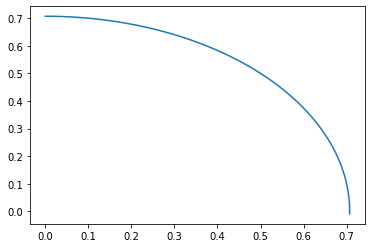

In [66]:
X, Y = simple_contour_deux(f)
plt.plot(X, Y)

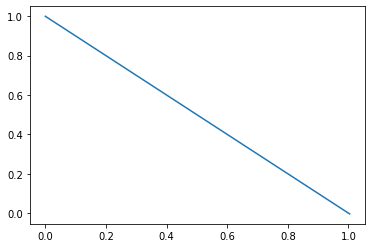

In [67]:
X, Y = simple_contour_deux(h)
plt.plot(X, Y)

## Contour complexe

### Amorce

In [68]:
def find_seed_complexe(f,s,t,u,v,c=0.0, eps=2**-26):
    #ici, on réalise une recherche dichotomique comme pour find_seed, sauf que celle-ci s'effectue sur un segment quelconque, déterminé par les points de coordonnées (s,u) et (t,v) où s<=t et u<=v
    if min(f(s,u),f(t,v)) <= c <= max(f(s,u),f(t,v)):
        if s==t: #si l'on est sur une arête verticale
            y1=u
            y2=v
            m=(y1+y2)/2
            while abs(f(s,m)-c)>eps:
                if f(s,u)<=c<=f(t,v):
                    if f(s,m)<c:
                        y1=m
                    else:
                        y2=m
                    m=(y1+y2)/2
                else:
                    if f(s,m)<c:
                        y2=m
                    else:
                        y1=m
                    m=(y1+y2)/2
            return (s,m)
        else: #si l'on est sur une arête horizontale
            x1=s
            x2=t
            m=(x1+x2)/2
            while abs(f(m,u)-c)>eps:
                if f(s,u)<=c<=f(t,v):
                    if f(m,u)<c:
                        x1=m
                    else:
                        x2=m
                    m=(x1+x2)/2
                else:
                    if f(m,u)<c:
                        x2=m
                    else:
                        x1=m
                    m=(x1+x2)/2   
            return (m,u)
    else:
        return None

### Modifications et amélioration de la première méthode (tracé du graphe de la fonction implicite)

In [69]:
def psi_prime_2(f, x, y) :
    T = grad_f(f, x, y)
    if T[1] != 0 :
        return float(-T[0]/T[1])
    else :
        return None #renvoie None si le théorème des fonctions implicites ne s'applique pas (tangente verticale)

In [70]:
def point_suivant_droite(f, x, y, delta = 0.01) : 
 #A chaque étape, on calcule à partir de la donnée de psi prime les coordonnées du point suivant dans le sens des x croissants sur la ligne de niveau, avec l'approximation f(x+h)=f(x)=f'(x)*h pour h petit
    pp = psi_prime_2(f, x, y)
    if pp != None :  #tangente verticale qui ne permet pas le calcul de psi_prime
        h = delta/np.sqrt(1 + pp**2)
        return (float(x + h), float(y + h*pp))
    else :
        return (x, None)
    
def point_suivant_gauche(f, x, y, delta = 0.01) :
    #De même pour le point suivant dans le sens des x décroissants
    pp = psi_prime_2(f, x, y)
    if pp != None :  #tangente verticale
        h = -delta/np.sqrt(1 + pp**2)
        return (float(x + h), float(y + h*pp))
    else :
        return(x, None)

On définit ici point_suivant_gauche parce qu'il est possible (contrairement au cas précédent où on cherchait une amorce sur l'aête de gauche de la cellule) qu'on ait besoin de tracer la courbe dans le sens des $x$ décoissants, par exemple dans le cas où le point de départ donné par find_seed_complexe se trouve sur l'arête de droite de la cellule.

### Contour complexe

In [71]:
def simple_contour_final(f,i,j,xc,yc,c,delta) :  #tracé de la ligne de niveau dans la cellule (i,j)
    carre_a_visiter=[(xc[i],xc[i],yc[j],yc[j+1]),(xc[i],xc[i+1],yc[j+1],yc[j+1]),(xc[i+1],xc[i+1],yc[j],yc[j+1]), (xc[i],xc[i+1],yc[j],yc[j])]  #quadruplets qui caractérisent chaque arête d'une cellule
    while carre_a_visiter != [] :#tant qu'il reste une arête à traiter, on cherche s'il existe dessus une racine et on cherche pas à pas le point suivant de la ligne de niveau
        (s,t,u,v) = carre_a_visiter.pop(0)
        if find_seed_complexe(f, s, t, u, v, c) != None :
            x,y = find_seed_complexe(f,s,t,u,v,c)
            abscisse=[x]
            ordonnee=[y]
            while xc[i]<=abscisse[-1]<=xc[i+1] and yc[j]<=ordonnee[-1]<=yc[j+1] :
                x, y = point_suivant_droite(f, abscisse[-1], ordonnee[-1])#on commence par chercher les points suivants dans le sens des x croissants
                abscisse.append(x)
                if y != None : #si l'on n'est pas dans le cas d'une tangente verticale, on ajoute y à ordonnee
                    ordonnee.append(y)
                else : 
                    y = ordonnee[-1] #on reste où on est 
                    if len(ordonnee) == 1 : # la pente verticale se trouve sur l'arête
                        if y == yc[j+1] :
                            ordonnee.append(y-delta*(2**(-26))) #on descend à la verticale pour rester dans la cellule
                        else :
                            ordonnee.append(y+delta*(2**(-26))) # on monte à la verticale pour rester dans la cellule
                    else :
                        yp = abscisse[-2]
                        # on suppose que les points sont suffisamment proches les uns des autres pour que la dérivée n'ait pas changée de signe entre les deux derniers points
                        if yp - y > 0 : # la ligne de niveau descend
                            ordonnee.append(y-delta*(2**(-26)))
                        else : # la ligne de niveau monte
                            ordonnee.append(y+delta*(2**(-26)))
            if len(abscisse) == 2 : # dans le cas où l'on était sur l'arête de droite, il ne faut pas chercher les points suivants dans le sens des x croissants mais décroissants
                abscisse.pop()
                ordonnee.pop()
                while xc[i]<=abscisse[-1]<=xc[i+1] and yc[j]<=ordonnee[-1]<=yc[j+1] :
                    x, y = point_suivant_gauche(f, abscisse[-1], ordonnee[-1])
                    abscisse.append(x)
                    if y != None :
                        ordonnee.append(y)
                    else :
                        y = ordonnee[-1]
                        if len(ordonnee) == 1 :
                            if y == yc[j+1] :
                                ordonnee.append(y-delta*(2**(-26)))
                            else :
                                ordonnee.append(y+delta*(2**(-26)))
                        else :
                            yp = abscisse[-2]
                            if yp - y > 0 :
                                ordonnee.append(y-delta*(2**(-26)))
                            else :
                                ordonnee.append(y+delta*(2**(-26)))
            return abscisse, ordonnee
    return [],[]

In [72]:
def contour(f, c=0.0, xc=[(i*0.1) -1.0 for i in range(21)], yc=[(i*0.1) -1.0 for i in range(21)], delta=0.01) :
    xs=[]
    ys=[]
    for i in range(len(xc)-1):
        for j in range (len(yc)-1) :# on parcourt chacune des cases (i,j) et on construit la section de contour correspondante
            fragment_x, fragment_y = simple_contour_final(f, i,j,xc,yc,c,delta)
            xs.append(fragment_x)
            ys.append(fragment_y)
    return xs, ys

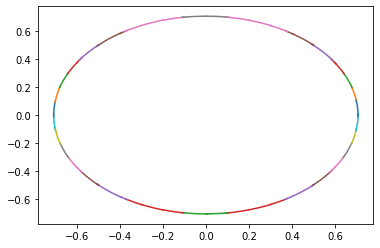

In [73]:
xs,ys = contour(f)
for x, y in zip(xs, ys) :
    plt.plot(x,y)

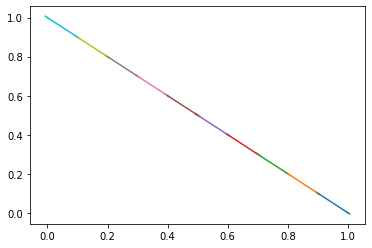

In [74]:
xs,ys = contour(h)
for x, y in zip(xs, ys) :
    plt.plot(x,y)

Remarque : la fonction contor complexe définie ici ne peut pas gérer les "demi-tours" de la ligne de niveau, sauf ci ceux-ci ont lieu pile sur l'arête d'une cellule (commme c'est la cas dans l'exemple) : en effet par défaut, on trace toujours la courbe dans le sens des x croissants, sauf si la courbe "part" vers les x décroissants dès l'amorce (sur une arête). On peut espérer qu'en chosissant des tailles de cellules suffisamment petites, on réduise la taille de la zone "probématique"; mais on ne pourra pas supprimer totalement ce problème, lié au fait que le théorème des fonctions implicites ne s'applique pas au voisinage du "demi-tour".

In [75]:
def simple_contour_final_deux(f, i, j , xc, yc, c , delta):
    carre_a_visiter=[(xc[i],xc[i],yc[j],yc[j+1]),(xc[i],xc[i+1],yc[j+1],yc[j+1]),(xc[i+1],xc[i+1],yc[j],yc[j+1]), (xc[i],xc[i+1],yc[j],yc[j])]  #quadruplets qui caractérisent chaque arête d'une cellule
    while carre_a_visiter != [] :#tant qu'il reste une arête à traiter, on cherche s'il existe dessus une racine et on cherche pas à pas le point suivant de la ligne de niveau
        (s,t,u,v) = carre_a_visiter.pop(0)
        if find_seed_complexe(f, s, t, u, v, c) != None :
            x,y = find_seed_complexe(f,s,t,u,v,c)
            abscisse=[x]
            ordonnee=[y]
            while xc[i]<=abscisse[-1]<=xc[i+1] and yc[j]<=ordonnee[-1]<=yc[j+1] :
                x, y = point_suivant_deux(f, abscisse[-1], ordonnee[-1], c, delta, 2**(-26)) #on commence par chercher les points suivants dans le sens des x croissants
                abscisse.append(x)
                ordonnee.append(y)
            return abscisse, ordonnee
    return [], []   

In [76]:
def contour_deux(f, c=0.0, xc=[(i*0.1) -1.0 for i in range(21)], yc=[(i*0.1) -1.0 for i in range(21)], delta=0.01) :
    xs=[]
    ys=[]
    for i in range(len(xc)-1):
        for j in range (len(yc)-1) :# on parcourt chacune des cases (i,j) et on construit la section de contour correspondante
            fragment_x, fragment_y = simple_contour_final_deux(f, i,j,xc,yc,c,delta)
            xs.append(fragment_x)
            ys.append(fragment_y)
    return xs, ys

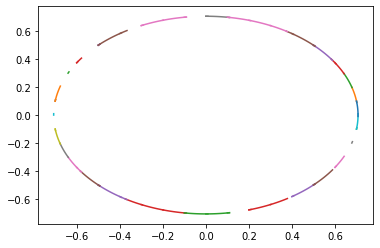

In [77]:
xs,ys = contour_deux(f)
for x, y in zip(xs, ys) :
    plt.plot(x,y)

Nous n'avons pas eu le temps de comprendre pourquoi il y a des "trous" dans ce tracé de ligne de niveau.  
Comme précédemment, l'algorithme point_suivant_deux recherche le point suivant vers la droite , il faudrait adapter à nouveau l'algorithme. 

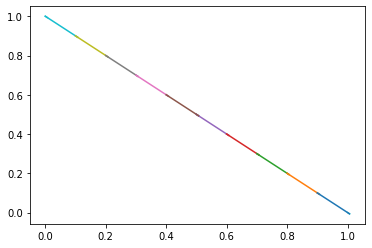

In [78]:
xs,ys = contour_deux(h)
for x, y in zip(xs, ys) :
    plt.plot(x,y)